# Jia Zeng 8936740 - Assignment 3
---

## Part 1

Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop the other two features for simplicity.

In [108]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [109]:
from sklearn.datasets import load_iris
iris = load_iris()

In [110]:
df_iris = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df_iris = df_iris[['petal length (cm)', 'petal width (cm)']]
df_iris.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Figure out if any preprocessing such as scaling would help here

In [111]:
scaler = StandardScaler()
df_iris_scaled = pd.DataFrame(scaler.fit_transform(df_iris), columns=df_iris.columns)

Draw elbow plot and from that figure out optimal value of k

In [112]:
sse = []
k_values = range(1, 11)  # check for K from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1)
    kmeans.fit(df_iris_scaled)
    sse.append(kmeans.inertia_)
    

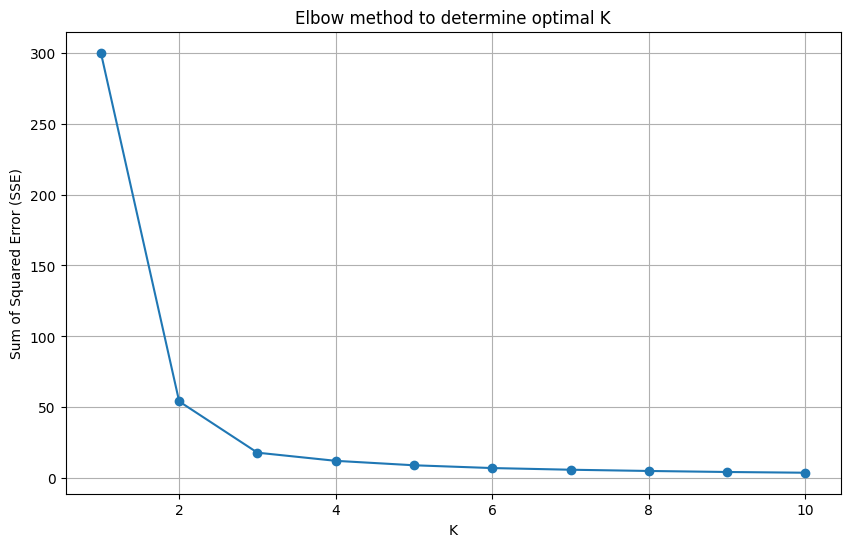

In [113]:
plt.figure(figsize=(10,6))
plt.plot(k_values, sse, marker='o')
plt.xlabel('K')
plt.ylabel('Sum of Squared Error (SSE)')
plt.title('Elbow method to determine optimal K')
plt.grid(True)

## Part 2

Load heart disease dataset in pandas dataframe

In [114]:
df_heart = pd.read_csv("./CSVs/heart.csv")
df_heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3

In [115]:
df_numeric = df_heart.select_dtypes(include=['float64', 'int64']) # only take numeric

for i in df_numeric.columns:
    z_scores = zscore(df_heart[i])
    filter = (z_scores > -3) & (z_scores < 3)
    df_heart = df_heart[filter]

Convert text columns to numbers using label encoding / one hot encoding

In [116]:
objects = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

label_encoder = LabelEncoder()
for c in objects:
    df_heart[c] = label_encoder.fit_transform(df_heart[c])

print(df_heart.dtypes)

Age                 int64
Sex                 int32
ChestPainType       int32
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int32
MaxHR               int64
ExerciseAngina      int32
Oldpeak           float64
ST_Slope            int32
HeartDisease        int64
dtype: object


Apply scaling

In [117]:
X = df_heart.drop('HeartDisease', axis = 1) # get except HeartDisease
y = df_heart['HeartDisease']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [118]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# SVM
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print(f'SVM Accuracy: {round(accuracy_score(y_test, svm_pred) * 100, 2)}%')

# LogisticRegression
log_reg_model = LogisticRegression(max_iter=10000)  # increased max_iter for convergence
log_reg_model.fit(X_train, y_train)
log_reg_pred = log_reg_model.predict(X_test)
print(f'Logistic Regression Accuracy: {round(accuracy_score(y_test, log_reg_pred) * 100, 2)}%')

# RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print(f'Random Forest Accuracy: {round(accuracy_score(y_test, rf_pred) * 100, 2)}%')

SVM Accuracy: 84.44%
Logistic Regression Accuracy: 83.33%
Random Forest Accuracy: 85.93%


Now use PCA to reduce dimensions, retrain your model and see its impact on your model in terms of accuracy.

In [119]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [120]:
# SVM with PCA
svm_model_pca = svm.SVC()
svm_model_pca.fit(X_train_pca, y_train)
svm_pred_pca = svm_model_pca.predict(X_test_pca)
print(f'SVM Accuracy: {round(accuracy_score(y_test, svm_pred_pca) * 100, 2)}%')

# Logistic Regression with PCA
log_reg_model_pca = LogisticRegression(max_iter=10000)
log_reg_model_pca.fit(X_train_pca, y_train)
log_reg_pred_pca = log_reg_model_pca.predict(X_test_pca)
print(f'Logistic Regression Accuracy: {round(accuracy_score(y_test, log_reg_pred_pca) * 100, 2)}%')

# Random Forest with PCA
rf_model_pca = RandomForestClassifier()
rf_model_pca.fit(X_train_pca, y_train)
rf_pred_pca = rf_model_pca.predict(X_test_pca)
print(f'Random Forest Accuracy: {round(accuracy_score(y_test, rf_pred_pca) * 100, 2)}%')

SVM Accuracy: 80.37%
Logistic Regression Accuracy: 80.0%
Random Forest Accuracy: 80.37%


---
##### Magic code for Convert to HTML
jupyter nbconvert --to html ./students-submissions/8936740/Assignment3.ipynb --output-dir ./students-submissions/8936740 --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_input_tags="['noshow']"